# Class Notebook

This jupyter notebook has only the reason to follow the class calculations and examples.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
%matplotlib inline

## Intro to Scikit Learn

This notebook aims to introduce the Scikit Learn package in a hands on method calculating some Support Vector Machine.

In [2]:
# Importing the Decision Tree from Scikit learn package.
from sklearn import tree

### Support Vector Machine

This is a way to turn the things clear for me.

The inputs of the Support Vector Machine method from Scikit Learn package: 

In [3]:
### Inputs.

# This is the coordinates of each point.
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

# This is the outcome of each classification.
Y = np.array([1, 1, 1, 2, 2, 2])

Have in mind, the X is the coordinates and Y is the results.

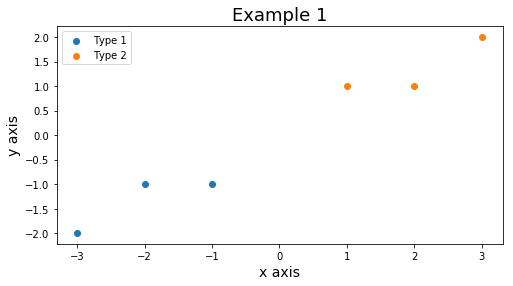

In [4]:
# Creating a dataframe to visualize these points.
df = pd.DataFrame(X, columns = ['x','y'])

# Adding the output colum.
df['result'] = Y

# Defining a function to plot graph.
def plot_graph(x_1, y_1, x_2, y_2, title, fig_x = 8, fig_y = 8):
    plt.figure(figsize = (fig_x,fig_y));
    plt.scatter(x = x_1, y = y_1);
    plt.scatter(x = x_2, y = y_2);
    plt.xlabel('x axis', fontsize = 14);
    plt.ylabel('y axis', fontsize = 14);
    plt.title(title, fontsize = 18);
    plt.legend(['Type 1','Type 2'])
    plt.show()

# Plotting the points.
plot_graph(x_1 = df.query('result == 1').x,
           y_1 = df.query('result == 1').y,
           x_2 = df.query('result == 2').x,
           y_2 = df.query('result == 2').y,
           title = 'Example 1',
           fig_x = 8,
           fig_y = 4)

Visually, I can identify two groups.

Let's train our model.

In [5]:
# Creating the classifier.
clf = tree.DecisionTreeClassifier() 

# Calculating the coefficients as known as Fitting/Training the model.
clf.fit(X, Y);

Given a new point (-0.8, -1), what is the classification of this point?

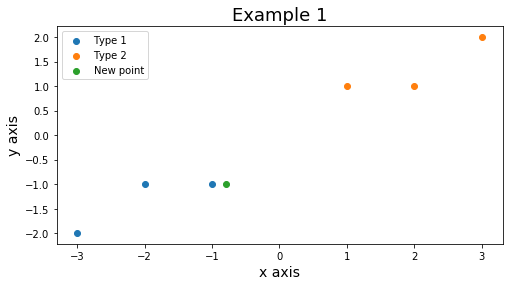

In [6]:
# Plotting the points.
plt.figure(figsize = (8,4));
plt.scatter(x = df.query('result == 1').x, y = df.query('result == 1').y);
plt.scatter(x = df.query('result == 2').x, y = df.query('result == 2').y);
plt.scatter(x = -0.8, y = -1);
plt.xlabel('x axis', fontsize = 14);
plt.ylabel('y axis', fontsize = 14);
plt.title('Example 1', fontsize = 18);
plt.legend(['Type 1','Type 2','New point'])
plt.show()

Visually, I expect this new point were a type 1.

Let's confirm it using the `.predict()` method from the scikit learn package.

In [7]:
print("Predicted type:", clf.predict([[-0.8, -1]]))

Predicted type: [1]


In [8]:
print("Predicted type:", clf.predict([[-1,1]]))

Predicted type: [1]


### Creating the dataframes

In [9]:
import random

def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

#    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test
#    return training_data, test_data

In [10]:
# Creating data to use in my example.
features_train, labels_train, features_test, labels_test = makeTerrainData()

### Plotting the Training Dataframe

In [11]:
# Initializing a Dataframe.
df_5 = pd.DataFrame()

# Adding the X values.
df_5[['x', 'y']] = pd.DataFrame(features_train)

# Adding the predicted values.
df_5['result'] = labels_train


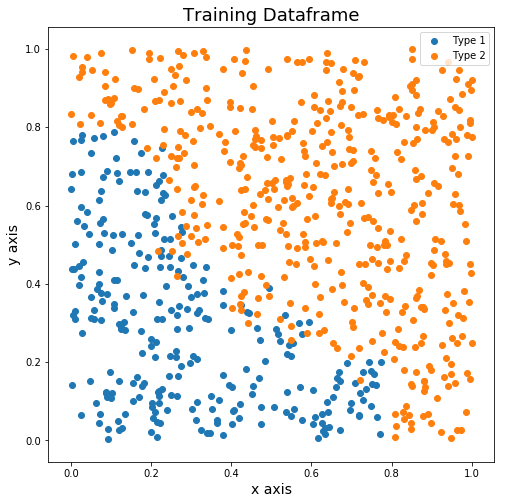

In [12]:
# Plotting the points.
plot_graph(x_1 = df_5.query('result == 0').x,
           y_1 = df_5.query('result == 0').y,
           x_2 = df_5.query('result == 1').x,
           y_2 = df_5.query('result == 1').y,
           title = 'Training Dataframe')

In [13]:
# Creating the classifier.
clf = tree.DecisionTreeClassifier()

# Training or fitting the model.
clf.fit(features_train, labels_train)

# Predicting
pred = clf.predict(features_test)

### Accuracy Calculation

I will use the same example from the class lesson, for this reason I will copy the function used to create the dataset.

* `features`: List of coordinates (x, y);
* `labels`: Each coordinates has a classification (0 or 1);

Bear in mind, there are train and test dataframe.

* Training dataframe: Used to fit the model.
* Test dataframe: Complete different dataframe from the training dataframe, used to evaluate the model.

Let's create the classifier, later train the model and finally predict the labels of the test dataframe.

Now, we have performed the prediction of the `features_test`, as a supervised algorithm we have "the answer" of each coordinate of `features_test`. So, let's compare the `pred` with the real/observed outputs.

There are two ways in this example.

* Using ordinary methods and functions, and;
* Built-in method.

#### Ordinary coding

In [14]:
# Using ordinary coding.
(pred == labels_test).mean()

0.912

#### Built-in method from scikit learn

In [15]:
from sklearn.metrics import accuracy_score

# Calculating the accurary using the built-in method.
accuracy = accuracy_score(pred, labels_test)

# Printing the accurary proportion.
accuracy

0.912

#### Plotting

In [16]:
# Initializing a Dataframe.
df_2 = pd.DataFrame()

# Adding the X values.
df_2[['x', 'y']] = pd.DataFrame(features_test)

# Adding the predicted values.
df_2['result'] = pred

# Printing the first 5 rows.
df_2.head()

,x,y,result
0,0.323274,0.325050,0.0
1,0.970185,0.662227,1.0
2,0.404175,0.525477,1.0
3,0.514596,0.313753,1.0
4,0.988119,0.173182,1.0


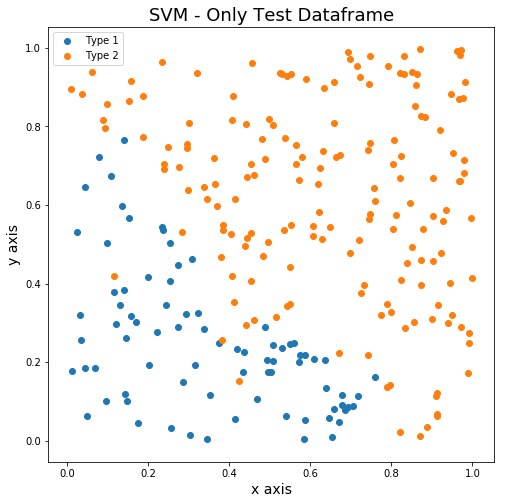

In [17]:
# Plotting the points.
plot_graph(x_1 = df_2.query('result == 0').x,
           y_1 = df_2.query('result == 0').y,
           x_2 = df_2.query('result == 1').x,
           y_2 = df_2.query('result == 1').y,
           title = 'SVM - Only Test Dataframe')

### `min_samples_split`

In [20]:
# Creating the classifier.
clf = tree.DecisionTreeClassifier(min_samples_split = 50)

# Training or fitting the model.
clf.fit(features_train, labels_train)

# Predicting
pred = clf.predict(features_test)

# Calculating the accurary using the built-in method.
accuracy = accuracy_score(pred, labels_test)

# Printing the accurary proportion.
accuracy

0.912

Entropy(flat)

In [42]:
0

0

Entropy(steep)

In [47]:
- np.log2(0.333333) * 0.333333 - np.log2(0.6666666) * 0.6666666

0.918295843813927

Information Gain

In [46]:
1 - (0.9182 * 3/4) - (0 * 1/4)

0.31135

In [49]:
- np.log2(0.5) * 0.5 - np.log2(0.5) * 0.5

1.0

In [51]:
1 - 1*2/4 - 1*2/4

0.0

In [55]:
np.log2(0)

C:\Users\ander\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


-inf